# Chapter 9: Common Continuous Distributions

## Introduction

In the previous chapter, we explored the fundamental concepts of continuous random variables, including Probability Density Functions (PDFs), Cumulative Distribution Functions (CDFs), expected value, and variance. While those concepts apply to *any* continuous random variable, many real-world phenomena tend to follow specific patterns. Over time, mathematicians and statisticians have identified and characterized several "families" of continuous distributions that appear frequently in practice.

This chapter introduces some of the most common and useful continuous distributions: the Uniform, Exponential, Normal (Gaussian), Gamma, and Beta distributions. For each, we will:

1.  Define its PDF and CDF.
2.  Discuss its key parameters and their interpretation.
3.  Calculate its expected value and variance.
4.  Highlight typical applications and characteristic properties.
5.  Demonstrate how to work with it using Python, primarily the `scipy.stats` module.

Understanding these distributions provides a powerful toolkit for modeling continuous phenomena, from arrival times and lifetimes to measurement errors and proportions. We'll also briefly touch upon the relationships between some of these distributions.

Let's start by importing the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate # For potential numerical integration examples

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Configure plots for better readability
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Uniform Distribution

The Uniform distribution is perhaps the simplest continuous distribution. It describes a variable whose outcome is equally likely within a specific interval $[a, b]$.

**Definition:** A random variable $X$ follows a Uniform distribution on the interval $[a, b]$, denoted $X \sim U(a, b)$, if its PDF is constant over the interval and zero elsewhere.

**PDF (Probability Density Function):**
$$
f(x; a, b) = \begin{cases}
 \frac{1}{b-a} & \text{for } a \le x \le b \\
 0 & \text{otherwise}
\end{cases}
$$
The total area under the PDF must be 1. Here, the area is simply the area of a rectangle with width $(b-a)$ and height $\frac{1}{b-a}$.

**CDF (Cumulative Distribution Function):**
$$
F(x; a, b) = P(X \le x) = \begin{cases}
 0 & \text{for } x < a \\
 \frac{x-a}{b-a} & \text{for } a \le x \le b \\
 1 & \text{for } x > b
\end{cases}
$$
The CDF increases linearly from 0 to 1 over the interval $[a, b]$.

**Parameters:**
* $a$: Lower bound of the interval.
* $b$: Upper bound of the interval.

**Expected Value and Variance:**
* $E[X] = \frac{a+b}{2}$ (The midpoint of the interval)
* $Var(X) = \frac{(b-a)^2}{12}$

**Applications:**
* Modeling random number generators.
* Representing uncertainty when only the range of possible values is known.
* Situations where any value in an interval is equally plausible (e.g., arrival time of a train within a 1-hour window, assuming it's equally likely to arrive at any minute).

**Example:** A train is scheduled to arrive at 3:00 PM, but it can arrive uniformly randomly anytime between 2:55 PM and 3:05 PM. Let $X$ be the arrival time in minutes past 2:55 PM. Then $X \sim U(0, 10)$.

**Python Implementation (`scipy.stats.uniform`):**

`scipy.stats.uniform` uses `loc` for the start point ($a$) and `scale` for the width ($b-a$).

In [3]:
# Define the parameters for the train example: a=0, b=10
a = 0
b = 10
loc = a
scale = b - a

In [4]:
# Create a uniform distribution object
uniform_dist = stats.uniform(loc=loc, scale=scale)

In [5]:
# Print key properties
print(f"Uniform Distribution U({a}, {b})")
print(f"Mean (Expected Value): {uniform_dist.mean():.2f} (Theoretical: {(a+b)/2:.2f})")
print(f"Variance: {uniform_dist.var():.2f} (Theoretical: {(b-a)**2/12:.2f})")
print(f"Standard Deviation: {uniform_dist.std():.2f}")

Uniform Distribution U(0, 10)
Mean (Expected Value): 5.00 (Theoretical: 5.00)
Variance: 8.33 (Theoretical: 8.33)
Standard Deviation: 2.89


In [6]:
# Calculate probabilities using PDF and CDF
# P(X <= 3 minutes past 2:55) = P(arrival by 2:58 PM)
prob_le_3 = uniform_dist.cdf(3)
print(f"\nP(X <= 3) = {prob_le_3:.2f}")


P(X <= 3) = 0.30


In [7]:
# P(X > 7 minutes past 2:55) = P(arrival after 3:02 PM)
prob_gt_7 = 1 - uniform_dist.cdf(7) # Or uniform_dist.sf(7)
print(f"P(X > 7) = {prob_gt_7:.2f}")

P(X > 7) = 0.30


In [8]:
# P(2 <= X <= 5) = F(5) - F(2)
prob_between_2_5 = uniform_dist.cdf(5) - uniform_dist.cdf(2)
print(f"P(2 <= X <= 5) = {prob_between_2_5:.2f}")

P(2 <= X <= 5) = 0.30


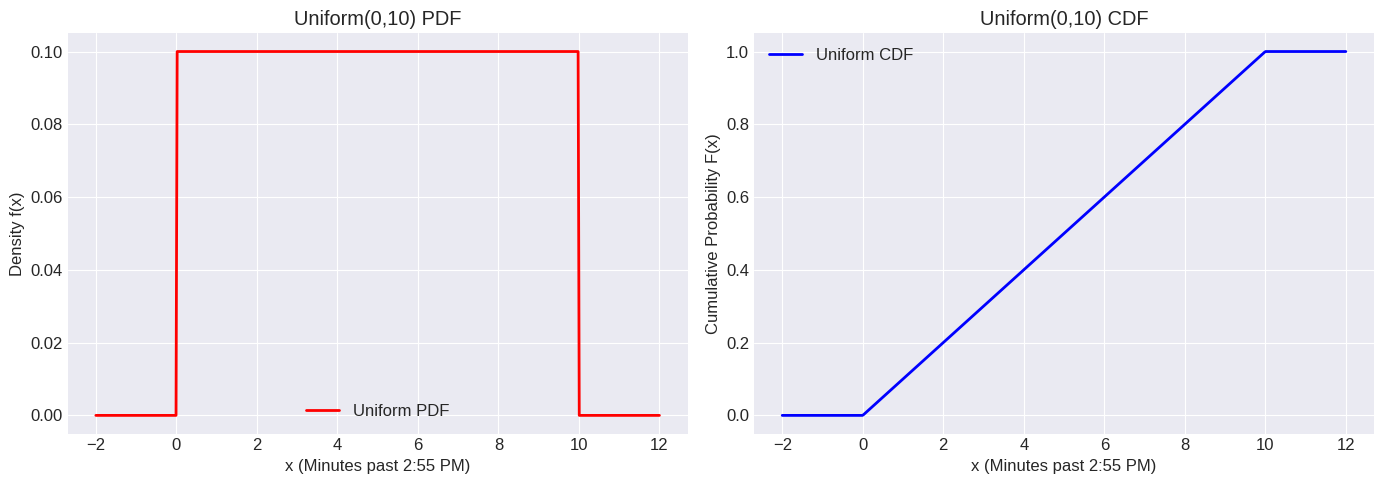

In [9]:
# Plotting the PDF and CDF
x = np.linspace(a - 2, b + 2, 500) # Range slightly outside [a, b]
pdf_values = uniform_dist.pdf(x)
cdf_values = uniform_dist.cdf(x)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(x, pdf_values, 'r-', lw=2, label='Uniform PDF')
ax[0].set_title(f'Uniform({a},{b}) PDF')
ax[0].set_xlabel('x (Minutes past 2:55 PM)')
ax[0].set_ylabel('Density f(x)')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(x, cdf_values, 'b-', lw=2, label='Uniform CDF')
ax[1].set_title(f'Uniform({a},{b}) CDF')
ax[1].set_xlabel('x (Minutes past 2:55 PM)')
ax[1].set_ylabel('Cumulative Probability F(x)')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

In [10]:
# Generate random samples
num_samples = 10000
samples = uniform_dist.rvs(size=num_samples)

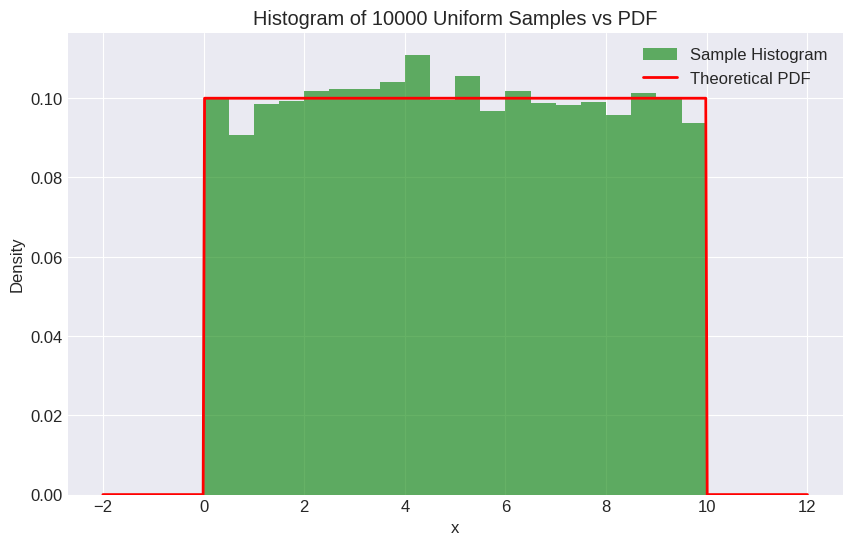

In [11]:
# Plot histogram of samples vs theoretical PDF
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=20, density=True, alpha=0.6, color='g', label='Sample Histogram')
plt.plot(x, pdf_values, 'r-', lw=2, label='Theoretical PDF')
plt.title(f'Histogram of {num_samples} Uniform Samples vs PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

## 2. Exponential Distribution

The Exponential distribution describes the time until an event occurs in a Poisson process (a process where events occur continuously and independently at a constant average rate).

**Definition:** A random variable $T$ follows an Exponential distribution with rate parameter $\lambda > 0$, denoted $T \sim Exp(\lambda)$, if its PDF describes the waiting time for the first event.

**PDF (Probability Density Function):**
$$
f(t; \lambda) = \begin{cases}
 \lambda e^{-\lambda t} & \text{for } t \ge 0 \\
 0 & \text{for } t < 0
\end{cases}
$$

**CDF (Cumulative Distribution Function):**
$$
F(t; \lambda) = P(T \le t) = \begin{cases}
 1 - e^{-\lambda t} & \text{for } t \ge 0 \\
 0 & \text{for } t < 0
\end{cases}
$$
The probability that the event has *not* occurred by time $t$ is $P(T > t) = 1 - F(t) = e^{-\lambda t}$. This is often called the survival function.

**Parameter:**
* $\lambda$: The rate parameter (average number of events per unit of time).

**Expected Value and Variance:**
* $E[T] = \frac{1}{\lambda}$ (The average waiting time)
* $Var(T) = \frac{1}{\lambda^2}$

**Memoryless Property:**
A key property of the Exponential distribution is that it is *memoryless*. This means that the probability of the event occurring in the next time interval, given that it hasn't occurred yet, is independent of how long we've already waited. Formally:
$$ P(T > s+t \mid T > s) = P(T > t) $$
for any $s, t \ge 0$.

**Applications:**
* Modeling the time until the next customer arrives.
* Modeling the lifetime of electronic components or radioactive decay times (assuming a constant failure rate).
* Modeling the time between earthquakes or other rare events.

**Example:** The lifetime of a certain type of electronic component follows an Exponential distribution. On average, a component lasts 1000 hours. What is the probability that a component lasts more than 1200 hours?

Here, the average lifetime is $E[T] = 1000$. Since $E[T] = 1/\lambda$, the rate parameter is $\lambda = 1/1000$ failures per hour.

**Python Implementation (`scipy.stats.expon`):**

`scipy.stats.expon` uses `scale` which corresponds to $1/\lambda$. It also has an optional `loc` parameter, which shifts the start of the distribution (default is 0).

In [12]:
# Define the parameters for the component lifetime example
mean_lifetime = 1000 # E[T] = 1/lambda
lambda_rate = 1 / mean_lifetime
scale_param = 1 / lambda_rate # scale = 1/lambda

In [13]:
# Create an exponential distribution object
exp_dist = stats.expon(scale=scale_param) # loc defaults to 0

In [14]:
# Print key properties
print(f"Exponential Distribution with rate lambda = {lambda_rate:.4f} (mean = {mean_lifetime})")
print(f"Mean (Expected Value): {exp_dist.mean():.2f} (Theoretical: {1/lambda_rate:.2f})")
print(f"Variance: {exp_dist.var():.2f} (Theoretical: {1/lambda_rate**2:.2f})")
print(f"Standard Deviation: {exp_dist.std():.2f}")

Exponential Distribution with rate lambda = 0.0010 (mean = 1000)
Mean (Expected Value): 1000.00 (Theoretical: 1000.00)
Variance: 1000000.00 (Theoretical: 1000000.00)
Standard Deviation: 1000.00


In [15]:
# Calculate probabilities
# P(T > 1200 hours)
prob_gt_1200 = exp_dist.sf(1200) # sf is the survival function (1 - CDF)
print(f"\nP(T > 1200) = {prob_gt_1200:.4f}")


P(T > 1200) = 0.3012


In [16]:
# P(T <= 800 hours)
prob_le_800 = exp_dist.cdf(800)
print(f"P(T <= 800) = {prob_le_800:.4f}")

P(T <= 800) = 0.5507


In [17]:
# P(500 <= T <= 1500) = F(1500) - F(500)
prob_between_500_1500 = exp_dist.cdf(1500) - exp_dist.cdf(500)
print(f"P(500 <= T <= 1500) = {prob_between_500_1500:.4f}")

P(500 <= T <= 1500) = 0.3834


In [18]:
# Demonstrate memoryless property: P(T > 1200 | T > 1000) == P(T > 200)?
# P(T > 1200 | T > 1000) = P(T > 1200 and T > 1000) / P(T > 1000)
#                        = P(T > 1200) / P(T > 1000)
prob_gt_1200_given_gt_1000 = exp_dist.sf(1200) / exp_dist.sf(1000)
prob_gt_200 = exp_dist.sf(200)
print(f"\nP(T > 1200 | T > 1000) = {prob_gt_1200_given_gt_1000:.4f}")
print(f"P(T > 200) = {prob_gt_200:.4f}")
print(f"Memoryless property holds: {np.isclose(prob_gt_1200_given_gt_1000, prob_gt_200)}")


P(T > 1200 | T > 1000) = 0.8187
P(T > 200) = 0.8187
Memoryless property holds: True


In [19]:
# Plotting the PDF and CDF
t = np.linspace(0, 5 * mean_lifetime, 500) # Plot up to 5x the mean lifetime
pdf_values = exp_dist.pdf(t)
cdf_values = exp_dist.cdf(t)

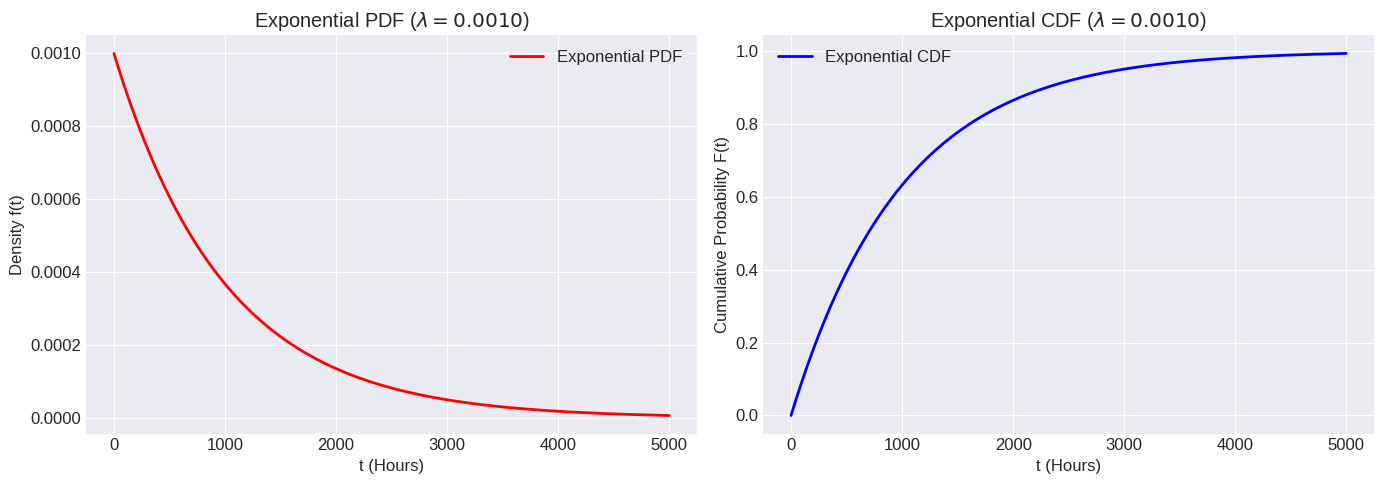

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(t, pdf_values, 'r-', lw=2, label='Exponential PDF')
ax[0].set_title(f'Exponential PDF ($\lambda={lambda_rate:.4f}$)')
ax[0].set_xlabel('t (Hours)')
ax[0].set_ylabel('Density f(t)')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t, cdf_values, 'b-', lw=2, label='Exponential CDF')
ax[1].set_title(f'Exponential CDF ($\lambda={lambda_rate:.4f}$)')
ax[1].set_xlabel('t (Hours)')
ax[1].set_ylabel('Cumulative Probability F(t)')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

In [21]:
# Generate random samples
num_samples = 10000
samples = exp_dist.rvs(size=num_samples)

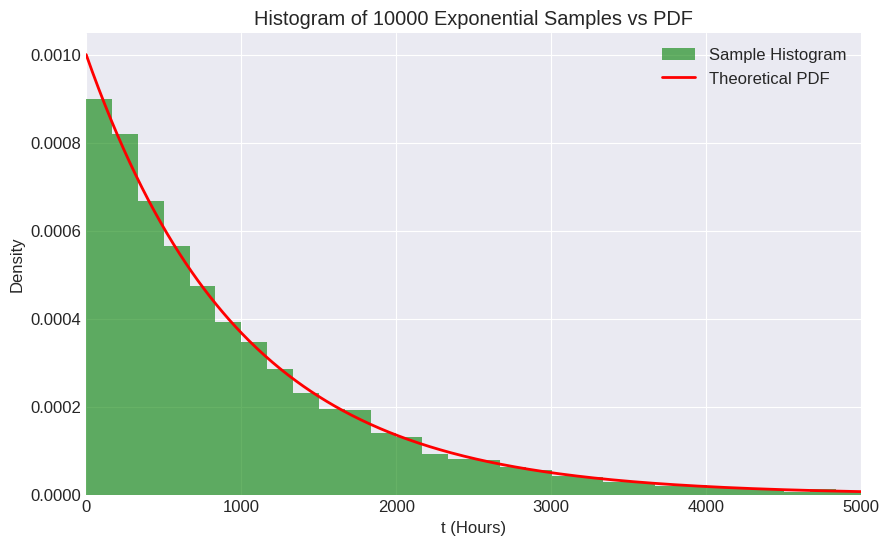

In [22]:
# Plot histogram of samples vs theoretical PDF
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Sample Histogram')
plt.plot(t, pdf_values, 'r-', lw=2, label='Theoretical PDF')
plt.title(f'Histogram of {num_samples} Exponential Samples vs PDF')
plt.xlabel('t (Hours)')
plt.ylabel('Density')
plt.xlim(0, 5 * mean_lifetime) # Adjust xlim for better view
plt.legend()
plt.show()

## 3. Normal (Gaussian) Distribution

The Normal distribution, often called the "bell curve," is arguably the most important distribution in probability and statistics. It arises naturally in many situations due to the Central Limit Theorem (which we'll cover later) and is used to model numerous physical, biological, and social phenomena.

**Definition:** A random variable $X$ follows a Normal distribution with mean $\mu$ and variance $\sigma^2$, denoted $X \sim N(\mu, \sigma^2)$, if its PDF is given by the characteristic bell-shaped curve centered at $\mu$.

**PDF (Probability Density Function):**
$$
f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{ - \frac{(x-\mu)^2}{2\sigma^2} }
$$
for $-\infty < x < \infty$.

**CDF (Cumulative Distribution Function):**
The CDF, $F(x) = P(X \le x)$, does not have a simple closed-form expression in terms of elementary functions. It's typically calculated using numerical methods or tables involving the standard normal distribution. The CDF is often denoted by $\Phi(z)$ for the standard normal case.

**Parameters:**
* $\mu$: The mean (or expected value), which determines the center of the distribution.
* $\sigma^2$: The variance ($\sigma$ is the standard deviation), which determines the spread or width of the distribution.

**Expected Value and Variance:**
* $E[X] = \mu$
* $Var(X) = \sigma^2$

**Standard Normal Distribution:**
A special case is the **Standard Normal Distribution**, denoted $Z \sim N(0, 1)$, where $\mu = 0$ and $\sigma^2 = 1$. Any Normal random variable $X \sim N(\mu, \sigma^2)$ can be *standardized* into a standard normal variable $Z$ using the transformation:
$$ Z = \frac{X - \mu}{\sigma} $$
This transformation is crucial for calculations, as probabilities for any Normal distribution can be found using the CDF of the Standard Normal distribution. $P(X \le x) = P\left(\frac{X-\mu}{\sigma} \le \frac{x-\mu}{\sigma}\right) = P(Z \le z)$, where $z = (x-\mu)/\sigma$.

**Empirical Rule (68-95-99.7 Rule):** For any Normal distribution:
* Approx. 68% of values lie within 1 standard deviation of the mean ($\mu \pm \sigma$).
* Approx. 95% of values lie within 2 standard deviations of the mean ($\mu \pm 2\sigma$).
* Approx. 99.7% of values lie within 3 standard deviations of the mean ($\mu \pm 3\sigma$).

**Applications:**
* Modeling heights, weights, and other biological measurements.
* Modeling measurement errors in experiments.
* Modeling standardized test scores (like IQ or SAT).
* Financial modeling (e.g., stock returns, though often with caveats).
* Approximation for other distributions (e.g., Binomial, Poisson) under certain conditions (due to CLT).

**Example:** Suppose IQ scores in a population are Normally distributed with a mean ($\mu$) of 100 and a standard deviation ($\sigma$) of 15. $X \sim N(100, 15^2)$.
1. What is the probability a randomly selected person has an IQ score between 85 and 115?
2. What is the probability a randomly selected person has an IQ score above 130?
3. What IQ score marks the 95th percentile?

**Python Implementation (`scipy.stats.norm`):**

`scipy.stats.norm` uses `loc` for the mean ($\mu$) and `scale` for the standard deviation ($\sigma$).

In [23]:
# Define the parameters for the IQ score example
mu = 100
sigma = 15

In [24]:
# Create a normal distribution object
norm_dist = stats.norm(loc=mu, scale=sigma)

In [25]:
# Print key properties
print(f"Normal Distribution N(mu={mu}, sigma^2={sigma**2})")
print(f"Mean (Expected Value): {norm_dist.mean():.2f} (Theoretical: {mu:.2f})")
print(f"Variance: {norm_dist.var():.2f} (Theoretical: {sigma**2:.2f})")
print(f"Standard Deviation: {norm_dist.std():.2f} (Theoretical: {sigma:.2f})")

Normal Distribution N(mu=100, sigma^2=225)
Mean (Expected Value): 100.00 (Theoretical: 100.00)
Variance: 225.00 (Theoretical: 225.00)
Standard Deviation: 15.00 (Theoretical: 15.00)


In [26]:
# Calculate probabilities
# 1. P(85 <= X <= 115) = F(115) - F(85)
# Note: 85 is mu - sigma, 115 is mu + sigma. Should be approx 68%.
prob_between_85_115 = norm_dist.cdf(115) - norm_dist.cdf(85)
print(f"\nP(85 <= X <= 115) = {prob_between_85_115:.4f} (Matches empirical rule: ~68%)")


P(85 <= X <= 115) = 0.6827 (Matches empirical rule: ~68%)


In [27]:
# 2. P(X > 130)
# Note: 130 is mu + 2*sigma. P(X > mu+2sigma) should be approx (1-0.95)/2 = 2.5%
prob_gt_130 = norm_dist.sf(130) # sf = 1 - cdf
print(f"P(X > 130) = {prob_gt_130:.4f} (Matches empirical rule: ~2.5%)")

P(X > 130) = 0.0228 (Matches empirical rule: ~2.5%)


In [28]:
# Check the 99.7% rule: P(mu - 3*sigma <= X <= mu + 3*sigma)
lower_3sd = mu - 3 * sigma
upper_3sd = mu + 3 * sigma
prob_within_3sd = norm_dist.cdf(upper_3sd) - norm_dist.cdf(lower_3sd)
print(f"P({lower_3sd:.1f} <= X <= {upper_3sd:.1f}) = {prob_within_3sd:.4f} (Matches empirical rule: ~99.7%)")

P(55.0 <= X <= 145.0) = 0.9973 (Matches empirical rule: ~99.7%)


In [29]:
# 3. Find the IQ score at the 95th percentile (value x such that F(x) = 0.95)
# Use the Percent Point Function (PPF), which is the inverse of the CDF
iq_95th_percentile = norm_dist.ppf(0.95)
print(f"\n95th percentile IQ score: {iq_95th_percentile:.2f}")
# Verification: Calculate CDF at this value
print(f"CDF at {iq_95th_percentile:.2f}: {norm_dist.cdf(iq_95th_percentile):.2f}")


95th percentile IQ score: 124.67
CDF at 124.67: 0.95


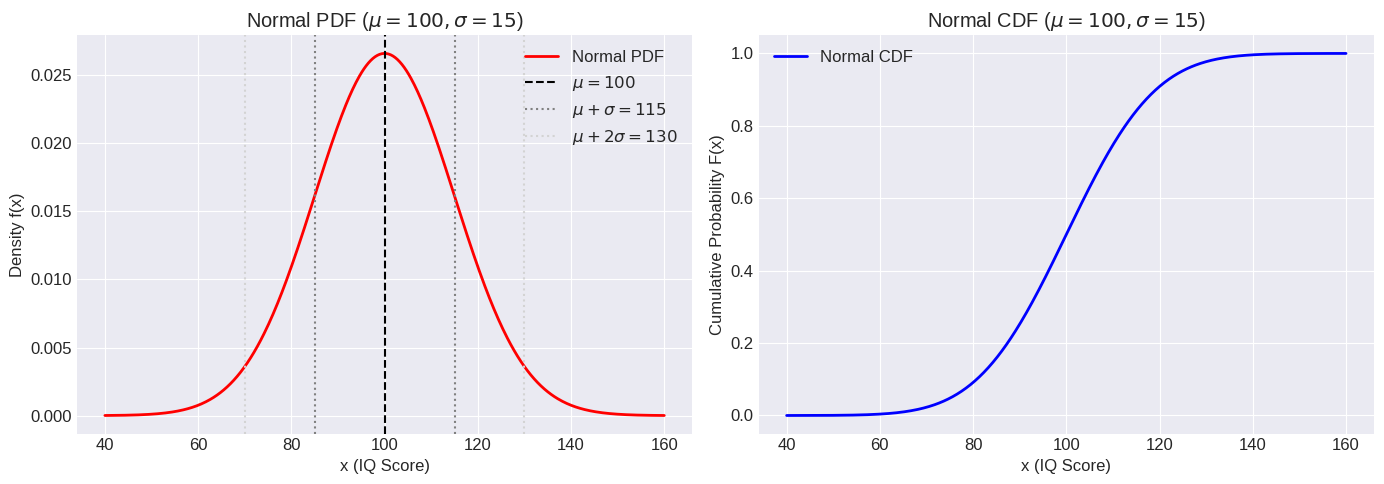

In [30]:
# Plotting the PDF and CDF
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500) # Range covering most of the probability mass
pdf_values = norm_dist.pdf(x)
cdf_values = norm_dist.cdf(x)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(x, pdf_values, 'r-', lw=2, label='Normal PDF')
ax[0].set_title(f'Normal PDF ($\mu={mu}, \sigma={sigma}$)')
ax[0].set_xlabel('x (IQ Score)')
ax[0].set_ylabel('Density f(x)')
# Add lines for mean and std devs
ax[0].axvline(mu, color='k', linestyle='--', label=f'$\mu={mu}$')
ax[0].axvline(mu + sigma, color='gray', linestyle=':', label=f'$\mu+\sigma={mu+sigma}$')
ax[0].axvline(mu - sigma, color='gray', linestyle=':')
ax[0].axvline(mu + 2*sigma, color='lightgray', linestyle=':', label=f'$\mu+2\sigma={mu+2*sigma}$')
ax[0].axvline(mu - 2*sigma, color='lightgray', linestyle=':')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(x, cdf_values, 'b-', lw=2, label='Normal CDF')
ax[1].set_title(f'Normal CDF ($\mu={mu}, \sigma={sigma}$)')
ax[1].set_xlabel('x (IQ Score)')
ax[1].set_ylabel('Cumulative Probability F(x)')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

In [31]:
# Generate random samples
num_samples = 10000
samples = norm_dist.rvs(size=num_samples)

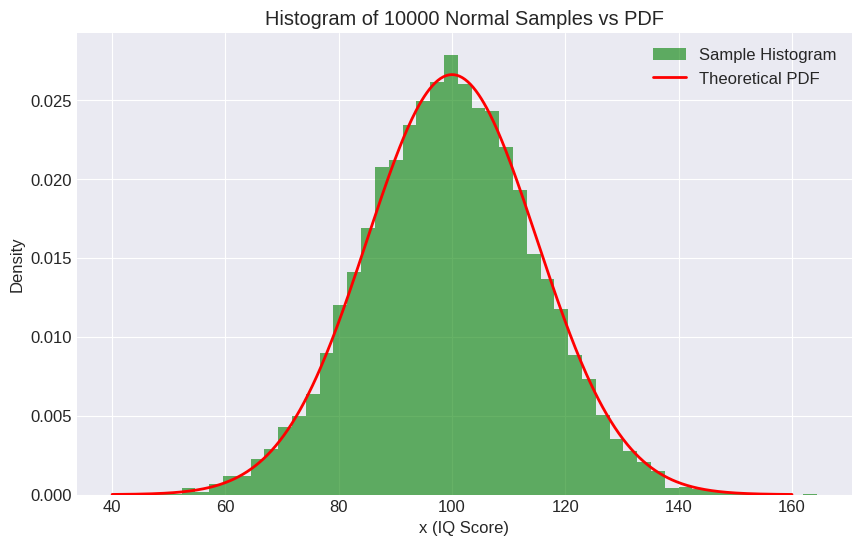

In [32]:
# Plot histogram of samples vs theoretical PDF
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Sample Histogram')
plt.plot(x, pdf_values, 'r-', lw=2, label='Theoretical PDF')
plt.title(f'Histogram of {num_samples} Normal Samples vs PDF')
plt.xlabel('x (IQ Score)')
plt.ylabel('Density')
plt.legend()
plt.show()

## 4. Gamma Distribution

The Gamma distribution is a flexible distribution defined for non-negative values. It is related to the Exponential distribution and the Chi-squared distribution. It arises naturally as the waiting time until the $k$-th event occurs in a Poisson process.

**Definition:** A random variable $X$ follows a Gamma distribution with shape parameter $k > 0$ and rate parameter $\lambda > 0$ (or scale parameter $\theta = 1/\lambda$), denoted $X \sim Gamma(k, \lambda)$ or $X \sim Gamma(k, \theta)$, if its PDF involves the Gamma function $\Gamma(k)$.

The Gamma function is defined as $\Gamma(k) = \int_0^\infty x^{k-1} e^{-x} dx$. For positive integers $k$, $\Gamma(k) = (k-1)!$.

**PDF (Probability Density Function):**
Using shape $k$ and rate $\lambda$:
$$
f(x; k, \lambda) = \frac{\lambda^k x^{k-1} e^{-\lambda x}}{\Gamma(k)} \quad \text{for } x \ge 0
$$
Using shape $k$ and scale $\theta = 1/\lambda$:
$$
f(x; k, \theta) = \frac{1}{\Gamma(k)\theta^k} x^{k-1} e^{-x/\theta} \quad \text{for } x \ge 0
$$

**CDF (Cumulative Distribution Function):**
The CDF involves the lower incomplete gamma function and doesn't have a simple closed form. It is usually computed numerically.

**Parameters:**
* $k$ (or $\alpha$): The shape parameter. It influences the peakedness of the distribution.
* $\lambda$ (or $\beta$): The rate parameter.
* $\theta = 1/\lambda$ (or $\beta$): The scale parameter. It stretches or compresses the distribution horizontally.
(Note: Parameterization can vary! `scipy.stats.gamma` uses shape `a` and `scale` $1/\lambda$).

**Expected Value and Variance:**
* $E[X] = \frac{k}{\lambda} = k\theta$
* $Var(X) = \frac{k}{\lambda^2} = k\theta^2$

**Relationship to Exponential:**
* The Exponential distribution is a special case of the Gamma distribution with shape parameter $k=1$. $Exp(\lambda) = Gamma(1, \lambda)$.
* The sum of $k$ independent $Exp(\lambda)$ random variables follows a $Gamma(k, \lambda)$ distribution. This connects to the idea of waiting time for the $k$-th event.

**Applications:**
* Modeling waiting times until multiple events occur (e.g., time until the 5th customer arrives).
* Reliability analysis and lifetime modeling (more flexible than Exponential).
* Queueing theory.
* Modeling rainfall amounts or insurance claims.
* Plays a role in Bayesian statistics (as a conjugate prior for the precision of a Normal distribution).

**Example:** Customers arrive at a store according to a Poisson process with an average rate of $\lambda = 2$ customers per minute. What is the probability that we have to wait between 1 and 3 minutes for the 5th customer to arrive?

The waiting time $T_5$ for the 5th customer follows a Gamma distribution with shape $k=5$ and rate $\lambda=2$. So $T_5 \sim Gamma(k=5, \lambda=2)$.

**Python Implementation (`scipy.stats.gamma`):**

`scipy.stats.gamma` uses `a` for the shape parameter ($k$) and `scale` for the scale parameter ($\theta = 1/\lambda$). It also has an optional `loc` parameter (default 0).

In [33]:
# Define parameters for the customer arrival example
k_shape = 5 # Number of events (shape parameter a in scipy)
lambda_rate = 2 # Rate of arrivals per minute
theta_scale = 1 / lambda_rate # Scale parameter in scipy

In [34]:
# Create a Gamma distribution object
gamma_dist = stats.gamma(a=k_shape, scale=theta_scale) # loc defaults to 0

In [35]:
# Print key properties
print(f"Gamma Distribution Gamma(k={k_shape}, lambda={lambda_rate}) or Gamma(a={k_shape}, scale={theta_scale})")
print(f"Mean (Expected Value): {gamma_dist.mean():.2f} (Theoretical: {k_shape / lambda_rate:.2f})")
print(f"Variance: {gamma_dist.var():.2f} (Theoretical: {k_shape / lambda_rate**2:.2f})")
print(f"Standard Deviation: {gamma_dist.std():.2f}")

Gamma Distribution Gamma(k=5, lambda=2) or Gamma(a=5, scale=0.5)
Mean (Expected Value): 2.50 (Theoretical: 2.50)
Variance: 1.25 (Theoretical: 1.25)
Standard Deviation: 1.12


In [36]:
# Calculate probability: P(1 <= T_5 <= 3) = F(3) - F(1)
prob_between_1_3 = gamma_dist.cdf(3) - gamma_dist.cdf(1)
print(f"\nP(1 <= T_5 <= 3) = {prob_between_1_3:.4f}")


P(1 <= T_5 <= 3) = 0.6623


In [37]:
# Verify relationship with Exponential: Gamma(k=1, lambda=2) should match Exp(lambda=2)
gamma_k1 = stats.gamma(a=1, scale=1/lambda_rate)
exp_dist_check = stats.expon(scale=1/lambda_rate)
print(f"\nGamma(k=1) Mean: {gamma_k1.mean():.2f}, Exp Mean: {exp_dist_check.mean():.2f}")
print(f"Gamma(k=1) Var: {gamma_k1.var():.2f}, Exp Var: {exp_dist_check.var():.2f}")
test_x = 1.5
print(f"Gamma(k=1) PDF at {test_x}: {gamma_k1.pdf(test_x):.4f}, Exp PDF at {test_x}: {exp_dist_check.pdf(test_x):.4f}")


Gamma(k=1) Mean: 0.50, Exp Mean: 0.50
Gamma(k=1) Var: 0.25, Exp Var: 0.25
Gamma(k=1) PDF at 1.5: 0.0996, Exp PDF at 1.5: 0.0996


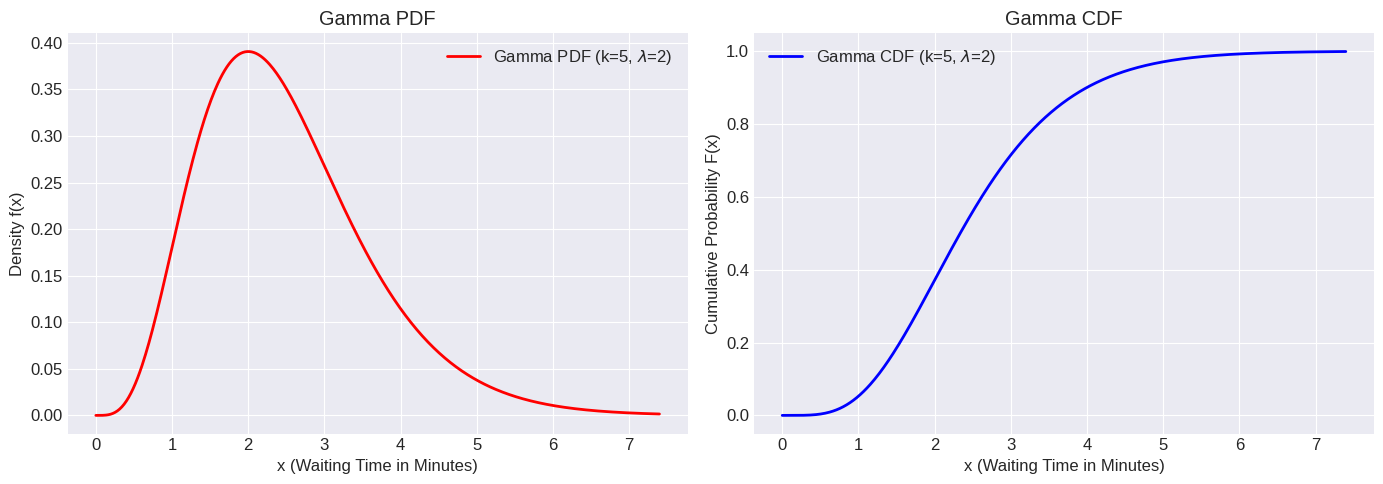

In [38]:
# Plotting the PDF and CDF for Gamma(5, 2)
x = np.linspace(0, gamma_dist.ppf(0.999), 500) # Plot up to 99.9th percentile
pdf_values = gamma_dist.pdf(x)
cdf_values = gamma_dist.cdf(x)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(x, pdf_values, 'r-', lw=2, label=f'Gamma PDF (k={k_shape}, $\lambda$={lambda_rate})')
ax[0].set_title('Gamma PDF')
ax[0].set_xlabel('x (Waiting Time in Minutes)')
ax[0].set_ylabel('Density f(x)')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(x, cdf_values, 'b-', lw=2, label=f'Gamma CDF (k={k_shape}, $\lambda$={lambda_rate})')
ax[1].set_title('Gamma CDF')
ax[1].set_xlabel('x (Waiting Time in Minutes)')
ax[1].set_ylabel('Cumulative Probability F(x)')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

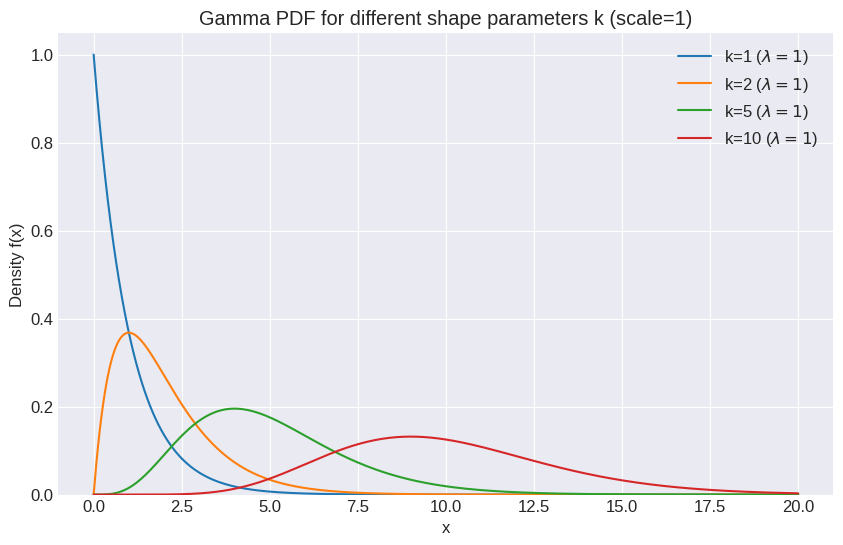

In [39]:
# Plot different shapes of Gamma by varying k (keeping scale=1 for simplicity)
plt.figure(figsize=(10, 6))
shapes_to_plot = [1, 2, 5, 10]
x_gamma_shapes = np.linspace(0, 20, 500)
for k_val in shapes_to_plot:
    plt.plot(x_gamma_shapes, stats.gamma.pdf(x_gamma_shapes, a=k_val, scale=1),
             label=f'k={k_val} ($\lambda=1$)')
plt.title('Gamma PDF for different shape parameters k (scale=1)')
plt.xlabel('x')
plt.ylabel('Density f(x)')
plt.legend()
plt.ylim(bottom=0)
plt.show()

## 5. Beta Distribution

The Beta distribution is defined on the interval $[0, 1]$, making it ideal for modeling probabilities, proportions, or percentages. Its shape is highly flexible, controlled by two positive shape parameters, $\alpha$ and $\beta$.

**Definition:** A random variable $X$ follows a Beta distribution with shape parameters $\alpha > 0$ and $\beta > 0$, denoted $X \sim Beta(\alpha, \beta)$, if its PDF involves the Beta function $B(\alpha, \beta)$.

The Beta function is defined as $B(\alpha, \beta) = \int_0^1 t^{\alpha-1} (1-t)^{\beta-1} dt = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$.

**PDF (Probability Density Function):**
$$
f(x; \alpha, \beta) = \frac{1}{B(\alpha, \beta)} x^{\alpha-1} (1-x)^{\beta-1} = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha-1} (1-x)^{\beta-1}
$$
for $0 \le x \le 1$.

**CDF (Cumulative Distribution Function):**
The CDF is the regularized incomplete beta function, $I_x(\alpha, \beta)$. It does not have a simple closed form but is computed numerically.

**Parameters:**
* $\alpha$: First positive shape parameter.
* $\beta$: Second positive shape parameter.
The shapes can vary greatly depending on the values of $\alpha$ and $\beta$:
* $\alpha = 1, \beta = 1$: Uniform distribution on $[0, 1]$.
* $\alpha > 1, \beta > 1$: Unimodal (bell-shaped, but can be skewed).
* $\alpha < 1, \beta < 1$: U-shaped (higher probability near 0 and 1).
* $\alpha = 1, \beta > 1$: Strictly decreasing.
* $\alpha > 1, \beta = 1$: Strictly increasing.
* $\alpha = \beta$: Symmetric around 0.5.

**Expected Value and Variance:**
* $E[X] = \frac{\alpha}{\alpha + \beta}$
* $Var(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

**Applications:**
* Modeling probabilities or proportions (e.g., click-through rate of an ad, percentage of defective items in a batch).
* Representing uncertainty about a probability value in Bayesian inference (often used as a prior distribution for the parameter of a Binomial/Bernoulli distribution).
* Project management (PERT analysis).
* Order statistics.

**Example:** Suppose we are modeling the click-through rate (CTR) of a new website banner ad. Based on prior experience with similar ads, we model the CTR ($p$) using a Beta distribution with $\alpha = 2$ and $\beta = 8$. This suggests a CTR that is likely low (since $\beta > \alpha$), centered around $E[p] = 2/(2+8) = 0.2$. What is the probability that the CTR is between 0.1 and 0.3?

**Python Implementation (`scipy.stats.beta`):**

`scipy.stats.beta` uses `a` for the first shape parameter ($\alpha$) and `b` for the second shape parameter ($\beta$). It also has optional `loc` and `scale` parameters to transform the distribution from $[0, 1]$ to $[loc, loc+scale]$, but the default is the standard $[0, 1]$ interval.

In [40]:
# Define parameters for the CTR example
alpha_param = 2 # Parameter a in scipy
beta_param = 8  # Parameter b in scipy

In [41]:
# Create a Beta distribution object
beta_dist = stats.beta(a=alpha_param, b=beta_param) # loc=0, scale=1 are defaults

In [42]:
# Print key properties
print(f"Beta Distribution Beta(alpha={alpha_param}, beta={beta_param})")
print(f"Mean (Expected Value): {beta_dist.mean():.2f} (Theoretical: {alpha_param / (alpha_param + beta_param):.2f})")
variance_theoretical = (alpha_param * beta_param) / ((alpha_param + beta_param)**2 * (alpha_param + beta_param + 1))
print(f"Variance: {beta_dist.var():.4f} (Theoretical: {variance_theoretical:.4f})")
print(f"Standard Deviation: {beta_dist.std():.4f}")

Beta Distribution Beta(alpha=2, beta=8)
Mean (Expected Value): 0.20 (Theoretical: 0.20)
Variance: 0.0145 (Theoretical: 0.0145)
Standard Deviation: 0.1206


In [43]:
# Calculate probability: P(0.1 <= p <= 0.3) = F(0.3) - F(0.1)
prob_between_01_03 = beta_dist.cdf(0.3) - beta_dist.cdf(0.1)
print(f"\nP(0.1 <= CTR <= 0.3) = {prob_between_01_03:.4f}")


P(0.1 <= CTR <= 0.3) = 0.5788


In [44]:
# Find the median (50th percentile) CTR
median_ctr = beta_dist.ppf(0.5)
print(f"Median (50th percentile) CTR: {median_ctr:.4f}")

Median (50th percentile) CTR: 0.1796


In [45]:
# Plotting the PDF and CDF for Beta(2, 8)
x = np.linspace(0, 1, 500)
pdf_values = beta_dist.pdf(x)
cdf_values = beta_dist.cdf(x)

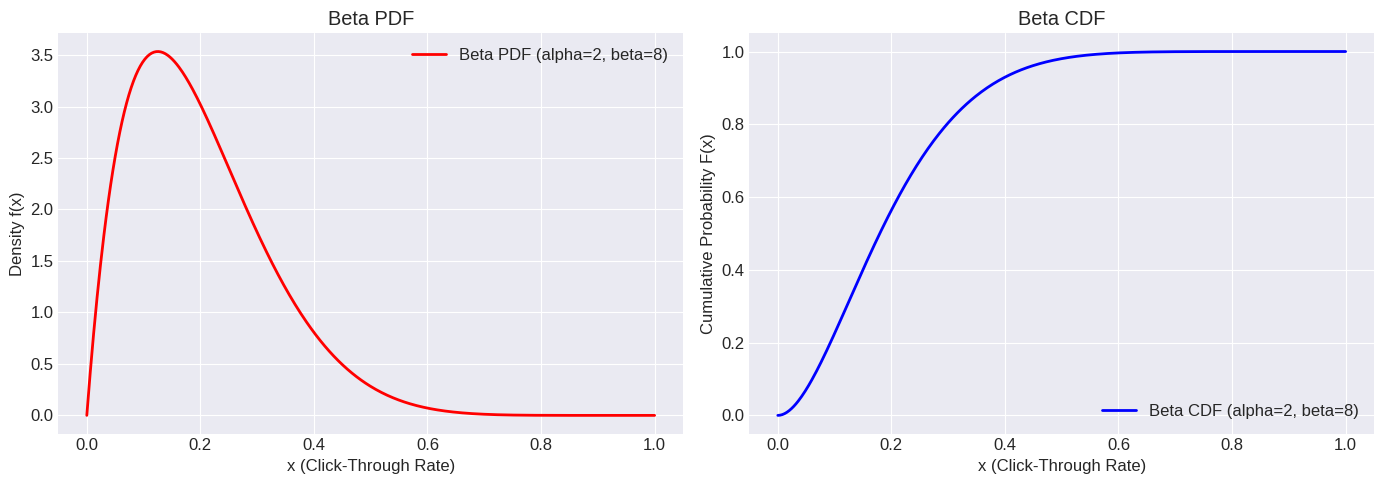

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(x, pdf_values, 'r-', lw=2, label=f'Beta PDF (alpha={alpha_param}, beta={beta_param})') # Problem: missing backslash before alpha/beta
ax[0].set_title('Beta PDF')
ax[0].set_xlabel('x (Click-Through Rate)')
ax[0].set_ylabel('Density f(x)')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(x, cdf_values, 'b-', lw=2, label=f'Beta CDF (alpha={alpha_param}, beta={beta_param})') # Problem: missing backslash before alpha/beta
ax[1].set_title('Beta CDF')
ax[1].set_xlabel('x (Click-Through Rate)')
ax[1].set_ylabel('Cumulative Probability F(x)')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

In [47]:
# Plot different shapes of Beta
plt.figure(figsize=(12, 8))
params_to_plot = [(1, 1), (2, 2), (5, 5), (2, 8), (8, 2), (0.5, 0.5), (1, 5), (5, 1)]
x_beta_shapes = np.linspace(0.001, 0.999, 500) # Avoid exact 0 and 1 for shapes < 1

<Figure size 1200x800 with 0 Axes>

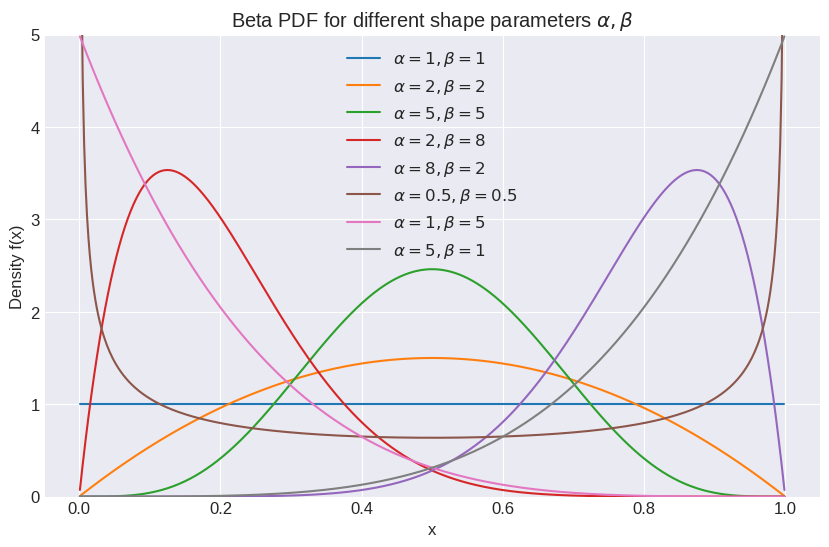

In [48]:
for a_val, b_val in params_to_plot:
    plt.plot(x_beta_shapes, stats.beta.pdf(x_beta_shapes, a=a_val, b=b_val),
             label=f'$\\alpha={a_val}, \\beta={b_val}$')

plt.title('Beta PDF for different shape parameters $\\alpha, \\beta$')
plt.xlabel('x')
plt.ylabel('Density f(x)')
plt.legend()
plt.ylim(0, 5) # Adjust ylim as needed, Beta PDF can be > 1
plt.grid(True)
plt.show()

## 6. Relationships Between Distributions

It's useful to be aware of the connections between these common distributions:

1.  **Exponential and Gamma:** As mentioned, the Exponential distribution is a special case of the Gamma distribution where the shape parameter $k=1$.
    * $Exp(\lambda) \equiv Gamma(k=1, \lambda)$
    * The sum of $k$ independent $Exp(\lambda)$ variables follows a $Gamma(k, \lambda)$ distribution.

2.  **Uniform and Beta:** The standard Uniform distribution $U(0, 1)$ is a special case of the Beta distribution where $\alpha = 1$ and $\beta = 1$.
    * $U(0, 1) \equiv Beta(\alpha=1, \beta=1)$

3.  **Normal Approximation (via Central Limit Theorem):** While not a direct equivalence, the Normal distribution can often approximate other distributions under certain conditions, most notably:
    * **Binomial Approximation:** A Binomial($n, p$) distribution can be approximated by $N(np, np(1-p))$ when $n$ is large and $p$ is not too close to 0 or 1 (rules of thumb like $np > 5$ and $n(1-p) > 5$ are common).
    * **Poisson Approximation:** A Poisson($\lambda$) distribution can be approximated by $N(\lambda, \lambda)$ when $\lambda$ is large (e.g., $\lambda > 10$ or $20$).
    * **Gamma Approximation:** A Gamma($k, \lambda$) distribution becomes more symmetric and bell-shaped (approaching Normal) as the shape parameter $k$ increases.
    (We will explore the Central Limit Theorem in detail in Chapter 14).

4.  **Chi-Squared Distribution:** The Chi-Squared distribution with $k$ degrees of freedom, $\chi^2(k)$, is a special case of the Gamma distribution: $\chi^2(k) \equiv Gamma(k/2, \text{rate}=1/2)$ or $Gamma(\text{shape}=k/2, \text{scale}=2)$. It arises frequently in statistical testing.

Understanding these relationships helps build intuition and allows leveraging properties from one distribution to understand another.

## 7. Working with `scipy.stats` Continuous Distributions

The `scipy.stats` module provides a consistent interface for working with these (and many other) distributions. For a continuous distribution object `dist` created from `stats.<distribution_name>()`:

* `dist.pdf(x)`: Probability Density Function at value(s) `x`.
* `dist.cdf(x)`: Cumulative Distribution Function up to value(s) `x`, $P(X \le x)$.
* `dist.sf(x)`: Survival Function, $1 - CDF(x)$, $P(X > x)$.
* `dist.ppf(q)`: Percent Point Function (Inverse CDF, Quantile Function). Finds $x$ such that $P(X \le x) = q$.
* `dist.isf(q)`: Inverse Survival Function. Finds $x$ such that $P(X > x) = q$.
* `dist.rvs(size=n)`: Generates `n` random samples (variates) from the distribution.
* `dist.mean()`: Returns the theoretical mean $E[X]$.
* `dist.median()`: Returns the theoretical median (50th percentile).
* `dist.var()`: Returns the theoretical variance $Var(X)$.
* `dist.std()`: Returns the theoretical standard deviation $\sqrt{Var(X)}$.
* `dist.stats(moments='mvsk')`: Returns mean ('m'), variance ('v'), skewness ('s'), kurtosis ('k').

**Key Parameters:**
* `loc`: Generally used for the location parameter (e.g., $a$ in Uniform, $\mu$ in Normal). Shifts the distribution.
* `scale`: Generally used for the scale parameter (e.g., $b-a$ in Uniform, $1/\lambda$ in Exponential, $\sigma$ in Normal, $\theta=1/\lambda$ in Gamma). Stretches/compresses the distribution.
* **Shape Parameters:** Distributions like Gamma (`a`) and Beta (`a`, `b`) have additional shape parameters specific to them.

Always check the documentation (`help(stats.<distribution_name>)`) for the specific parameter names and definitions used by SciPy, as they might differ slightly from textbook notations (especially rate vs. scale).

In [49]:
# %%
# Example: Using PPF for Normal distribution
# Find the interval [x1, x2] centered around the mean that contains 95% of the probability
mu = 100
sigma = 15
norm_dist = stats.norm(loc=mu, scale=sigma)

In [50]:
# The central 95% leaves 2.5% in each tail
lower_bound = norm_dist.ppf(0.025)
upper_bound = norm_dist.ppf(0.975) # Or norm_dist.isf(0.025)

In [51]:
print(f"The central 95% interval for N({mu}, {sigma**2}) is [{lower_bound:.2f}, {upper_bound:.2f}]")
# Check: These values should be approximately mu +/- 1.96*sigma
print(f"Theoretical interval [mu - 1.96*sigma, mu + 1.96*sigma]: [{mu - 1.96*sigma:.2f}, {mu + 1.96*sigma:.2f}]")

The central 95% interval for N(100, 225) is [70.60, 129.40]
Theoretical interval [mu - 1.96*sigma, mu + 1.96*sigma]: [70.60, 129.40]


## Chapter Summary

This chapter introduced five fundamental continuous probability distributions:

* **Uniform $U(a, b)$:** Equal probability over a fixed range $[a, b]$. Modeled using `stats.uniform(loc=a, scale=b-a)`.
* **Exponential $Exp(\lambda)$:** Waiting time for a single event in a Poisson process; memoryless property. Modeled using `stats.expon(scale=1/lambda)`.
* **Normal $N(\mu, \sigma^2)$:** Ubiquitous bell curve, central to statistics (CLT). Modeled using `stats.norm(loc=mu, scale=sigma)`.
* **Gamma $Gamma(k, \lambda)$:** Flexible distribution for non-negative values; waiting time for $k$ events. Modeled using `stats.gamma(a=k, scale=1/lambda)`.
* **Beta $Beta(\alpha, \beta)$:** Defined on $[0, 1]$, ideal for probabilities/proportions; very flexible shape. Modeled using `stats.beta(a=alpha, b=beta)`.

We explored their PDFs, CDFs, parameters, moments (mean, variance), and typical applications. Crucially, we learned how to use the `scipy.stats` module to calculate probabilities, find percentiles, generate random samples, and visualize these distributions in Python. Understanding these common distributions provides a robust foundation for modeling a wide variety of continuous phenomena encountered in data analysis and probabilistic modeling.

## Exercises

1.  **Uniform Wait Time:** A bus is scheduled to arrive every 20 minutes starting at the hour (e.g., 6:00, 6:20, 6:40...). You arrive at a random time. Assume your arrival time relative to the scheduled bus departure is uniformly distributed over the 20-minute interval.
    a. Define the random variable and the parameters of its distribution.
    b. What is the probability you wait less than 5 minutes for the next bus?
    c. What is the probability you wait between 10 and 15 minutes?
    d. What is the expected waiting time? Use `scipy.stats.uniform`.

2.  **Exponential Service Time:** The time it takes a bank teller to serve a customer follows an Exponential distribution with a mean service time of 3 minutes.
    a. What is the rate parameter $\lambda$?
    b. What is the probability a customer's service takes more than 5 minutes?
    c. What is the probability a customer's service takes less than 2 minutes?
    d. Given that a customer has already been served for 4 minutes, what is the probability their service will take at least 2 more minutes? (Hint: Memoryless property). Use `scipy.stats.expon`.

3.  **Normal Heights:** Assume adult male heights in a certain country are Normally distributed with a mean of 175 cm and a standard deviation of 7 cm. $X \sim N(175, 7^2)$.
    a. What percentage of men are taller than 185 cm?
    b. What percentage of men have heights between 170 cm and 180 cm?
    c. What height corresponds to the 90th percentile?
    d. Generate 5000 random samples from this distribution and plot a histogram. Overlay the theoretical PDF. Use `scipy.stats.norm`.

4.  **Gamma Repair Time:** The time (in hours) to repair a machine follows a Gamma distribution with shape parameter $k=3$ and scale parameter $\theta=2$ (rate $\lambda=0.5$).
    a. What is the expected repair time and the standard deviation?
    b. What is the probability that the repair takes less than 5 hours?
    c. What is the probability that the repair takes more than 10 hours? Use `scipy.stats.gamma`.

5.  **Beta Proportion:** A chemical process yields a product whose proportion of impurity $P$ is modeled by a $Beta(2, 5)$ distribution.
    a. What is the expected proportion of impurity?
    b. What is the probability that the impurity proportion is less than 0.1?
    c. What is the probability that the impurity proportion is greater than 0.5?
    d. Plot the PDF of this distribution. Use `scipy.stats.beta`.

Example Solution Structure for Exercise 1 (Students would fill this in)

In [52]:
# Exercise 1: Uniform Wait Time
wait_interval_max = 20
uniform_wait = stats.uniform(loc=0, scale=wait_interval_max)

In [53]:
# a. RV X = Waiting time (minutes), X ~ U(0, 20)
print("Ex 1: Uniform Wait Time")
print(f"a. X ~ U(0, {wait_interval_max})")

Ex 1: Uniform Wait Time
a. X ~ U(0, 20)


In [54]:
# b. P(X < 5)
prob_lt_5 = uniform_wait.cdf(5)
print(f"b. P(X < 5) = {prob_lt_5:.3f}")

b. P(X < 5) = 0.250


In [55]:
# c. P(10 <= X <= 15)
prob_10_15 = uniform_wait.cdf(15) - uniform_wait.cdf(10)
print(f"c. P(10 <= X <= 15) = {prob_10_15:.3f}")

c. P(10 <= X <= 15) = 0.250


In [56]:
# d. E[X]
expected_wait = uniform_wait.mean()
print(f"d. E[X] = {expected_wait:.2f} minutes")

d. E[X] = 10.00 minutes


(Students would add code for Exercises 2-5 similarly)